In [ ]:
"""
SELECT
         c.city_name
FROM
         sql.shipment s
JOIN sql.city c ON s.city_id = c.city_id

EXCEPT

SELECT
         cc.city_name
FROM
         sql.driver d 
JOIN sql.city cc ON d.city_id=cc.city_id
ORDER BY 1
"""
#Все водители проживают в городе Memphis, и мы видим, что он не выводится в результате запроса.

#Как вы, должно быть, заметили, для решения этой задачи мы использовали оператор EXCEPT. Принципы его работы мы сейчас разберём ↓

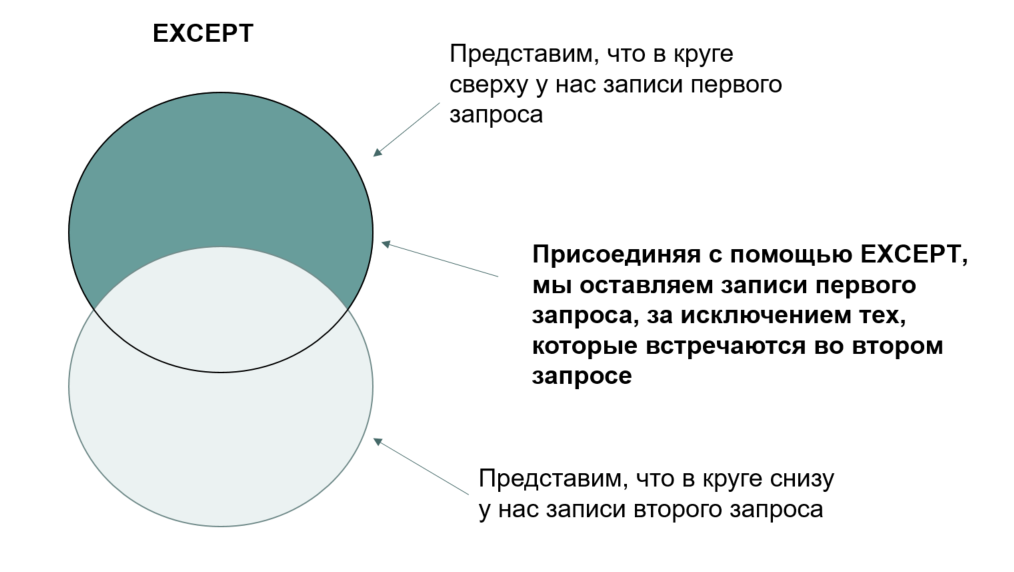

Синтаксические правила для оператора EXCEPT такие же, как и для UNION:

### INTERSECT

Вернёмся к нашему примеру с продажами канцтоваров.

С помощью оператора INTERSECT мы можем вывести те позиции, которые продавались и в мае, и в июне. Визуализировать это действие можно примерно так:

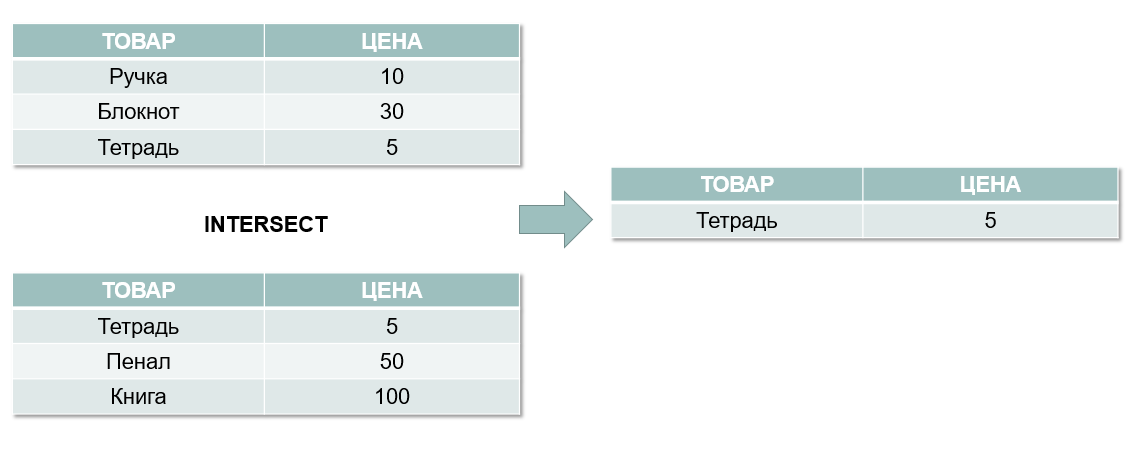

Оператор INTERSECT оставляет только те строки, которые являются общими для двух запросов (в нашем примере это Тетрадь).

Как EXCEPT, так и INTERSECT убирают дубликаты, если они имеются.

In [ ]:
#/*Напишите запрос, который выведет список id городов, в которых есть и клиенты, и доставки, и водители..*/
"""
SELECT
         c.city_id
FROM
         sql.shipment s
JOIN sql.city c ON s.city_id = c.city_id

intersect

SELECT
         cc.city_id
FROM
         sql.driver d 
JOIN sql.city cc ON d.city_id=cc.city_id
ORDER BY 1"""

In [ ]:
#/*Выведите zip-код, который есть как в таблице с клиентами, так и в таблице с водителями.*/
"""
SELECT
         s.zip
FROM
         sql.customer s

intersect

SELECT
         d.zip_code
FROM
         sql.driver d 

ORDER BY 1"""

In [ ]:
#/*Выведите города с максимальным и минимальным весом единичной доставки. Столбцы к выводу — city_name, weight.*/
"""
(select
    city_name , max(weight) weight
from sql.shipment s
    left join sql.city c on s.city_id = c.city_id
group by city_name 
order by weight desc
limit 1)

UNION ALL

(select
    city_name , min(weight) weight
from sql.shipment s
    left join sql.city c on s.city_id = c.city_id
group by city_name 
order by weight 
limit 1)"""

In [ ]:
#/*Выведите идентификационные номера клиентов (cust_id), которые совпадают с идентификационными номерами доставок (ship_id). Столбец к выводу — mutual_id. Отсортируйте по возрастанию.*/
"""
SELECT
         s.cust_id mutual_id
FROM
         sql.customer s

intersect

SELECT
         d.ship_id
FROM
         sql.shipment d 

ORDER BY 1
"""

In [ ]:
#/*Создайте справочник, содержащий уникальные имена клиентов, которые являются производителями (cust_type='manufacturer'), 
#и производителей грузовиков, а также о писание объекта — 'КЛИЕНТ' или 'ГРУЗОВИК'. Столбцы к выводу — object_name, object_description. 
#Отсортируйте по названию в алфавитном порядке.*/
"""
SELECT
         s.cust_name object_name , 'КЛИЕНТ' object_description
FROM
         sql.customer s
where cust_type='manufacturer'
union
SELECT
         c.make , 'ГРУЗОВИК' 
FROM
         sql.truck c
order by 1
"""